# Autocorrelação, PSD e cálculos de potência

## Autor: João Marcos Costa
### Data: 18/05/2017 (última atualização)

## Autocorrelação
### Definição estatística 
A função de autocorrelação ${R}_{xx}$ de um sinal aleatório descreve a dependência geral dos valores das amostras ao mesmo tempo sobre os valores das amostras em outro momento, visando encontrar padrões de repetição em sinais periódicos com ruido ou mesmo para identificar a frequência fundamental em falta num sinal implícita pelas suas frequências harmônicas.  

Define-se a autocorrelação de um sinal periódico como:
$${R}_{xx}(\tau)=\lim_{T\rightarrow \infty} \frac{1}{T}\int_{-T/2}^{T/2}x(t) \cdot  x(t+\tau)dt$$


Em que $T$ é o período de observação. $R_{xx}(\tau)$ é um número real cujo máximo está em $\tau=0$. 


Para um sinal amostrado, a autocorrelação é definida como:
 $$R_{xx}(m)=\frac{1}{N}\sum_{n=1}^{N-m+1}x(n) \cdot  x(n+m-1)$$

Para $m = 1,2, ... , M+1$ em que M é o número de atrasos. 

Por se tratar da análise de relação entre a função e ela mesma, podemos ter diversas aplicações como:


- Cancelamento de eco de um sinal causado pela reflexão em uma parede;
- Determinação da frequencia e potência de um sinal;
- Atraso entre sinais recebidos por sensores em posições diferentes (correlação cruzada).

Em sinais de energia, o resultado da autocorrelação nos fornece a função densidade de probabilidade da Energia, mais conhecida como ESD. Nos sinais de potência, o resultado é análogo: a autocorrelação fornece a PSD (Densidade espectral de potência).

### Cálculo
No código abaixo, calcularemos a autocorrelação de um sinal senoidal pela definição e compararemos com a saída da função _built-in_.
    

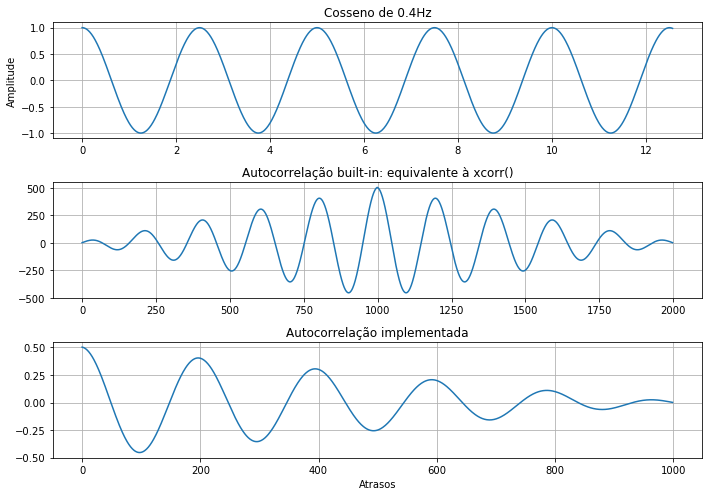

In [1]:
%matplotlib inline
import numpy as np
fc=0.4
N = 1000
t = np.linspace(0,4*np.pi,N)
x = np.cos(2.0*np.pi*t*fc)
#implementaçao:
def xcorr(sinal):
    N = len(sinal)
    rxx = np.zeros([N],dtype = float)
    for m in range(N):
        for n in range(N-m):
            rxx[m] = rxx[m]+x[n]*x[n+m]
    rxx = rxx/N
    return rxx

R_implementada = xcorr(x)

from matplotlib import pyplot as plt

auto = np.correlate(x,x,'full')
#auto = auto[int(auto.size/2):]/N

plt.figure(1,[10,7])

grafico_1 = plt.subplot(311)
plt.title("Cosseno de 0.4Hz")
plt.ylabel("Amplitude")
plt.grid()
plt.plot(t,x)

grafico_2 = plt.subplot(312)
plt.title("Autocorrelação built-in: equivalente à xcorr()")
plt.grid()
plt.plot(auto)

grafico_3 = plt.subplot(313)
plt.plot(R_implementada)
plt.xlabel("Atrasos")
plt.title("Autocorrelação implementada")
plt.grid()
plt.tight_layout()
plt.show()



## Energia e Potência

### Energia
Para um sinal de tempo contínuo x(t), entende-se como energia $E$ de $x(t)$:

$$E = \int\limits_{-\infty}^{+\infty} \left |x(n)\right |^{2}dn$$ 

Onde $ \phi = \left |x(n)\right |^{2}$ é a densidade de energia. Pelo teorema da convolução, podemos relacionar autocorrelação com a densidade espectral de energia através da transformada de Fourrier, de forma que:
$$ \phi = F[{R}_{xx}(\tau)]$$
Como trabalharemos sinais discretos no tempo, faremos:

$$E = T_{s}\sum\limits_{n=0}^{N-1} \left |  x[n]  \right |^{2} $$

Dado que a amostragem começará a partir do tempo $n=0$ e terminará em $n = N-1$.

### Potência e densidade espectral de potência

Todos os sinais periódicos são sinais potência. Seja a autocorrelação dada por:
$${R}_{xx}(\tau)=\lim_{T\rightarrow \infty} \frac{1}{T}\int_{-T/2}^{T/2}x(t) \cdot  x(t+\tau)dt$$
Pelo teorema da convolução, podemos relacionar autocorrelação com a densidade espectral de potência (PSD) através da transformada de Fourrier, de forma que:
 
$$S_{x}(f)=F[{R}_{xx}(\tau)]$$

Também podemos calcular a potência total pelo somatório infinitesimal da densidade de potencia:
$$P_{x}=\int_{-\infty}^{\infty}S_{x}(f)df$$

Como trabalharemos sinais discretos no tempo, faremos:

$$P = \frac{1}{N}\sum\limits_{n=0}^{N-1} \left |  x[n]  \right |^{2} $$
Dado que a amostragem começará a partir do tempo $n=0$ e terminará em $n = N-1$.

<Container object of 3 artists>

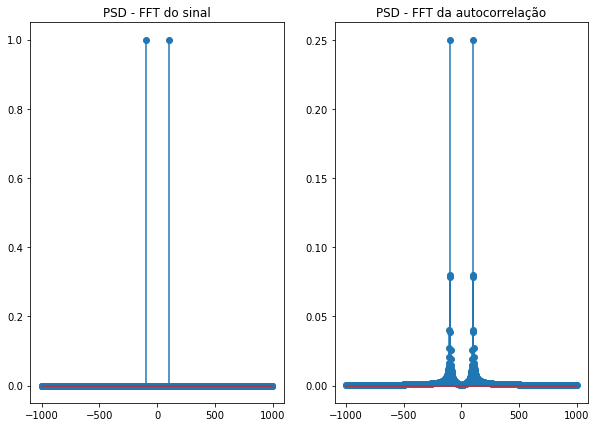

In [2]:
import numpy as np
from matplotlib import pyplot as plt
N=1000                                 #Número de amostras
f1=100                                 # Frequência do seno
FS=2000                                # Frequência de amostragem

n = np.arange(N)
x = np.sin(2.0*np.pi*f1*n/FS)
t = np.arange(1,N,1)*1.0/FS
rxx = xcorr(x)

freq = np.arange(-0.5*FS,0.5*FS,FS/N) #eixo das frequências

from scipy import fftpack

plt.figure(1,[10,7])
plt.subplot(121)
Xfft = fftpack.fftshift(fftpack.fft(x,N))
Sxx = 2.0*np.abs(Xfft)/N
plt.title("PSD - FFT do sinal")
plt.stem(freq,Sxx)


plt.subplot(122)
plt.title("PSD - FFT da autocorrelação")
Xfft2 = fftpack.fftshift(fftpack.fft(rxx,N))
Sxx2 = 2.0*np.abs(Xfft2)/N
plt.stem(freq,Sxx2)


### Potência - Amostras no tempo

No matlab podemos calcular a potencia de um sinal amostrado no tempo de várias formas:

- No tempo:
$$P = \frac{1}{N}\sum\limits_{n=0}^{N-1} \left |  x[n]  \right |^{2} $$

- Na frequência:

$$P = \sum\limits_{n=0}^{N-1} x[k]^{2} $$

- Pela autocorrelação:
$$P = R_{xx}(0)$$

 em que $R_{xx}(0)$ é a função autocorrelação em seu centro.


- Pela Variancia  $\sigma²(x)$:

$$ P[x²] = \overline{P}[x] + \sigma² $$ 

Como o sinal é senoidal, sua média é sempre zero pois possui picos positivo e negativo simétricos. Conclui-se  que a variância corresponde exatamente à potencia do sinal. <br>
Em Python, iremos implementar um método equivalente à função _bandpower()_ do Matlab, trabalhando com o espectro bilateral:

In [3]:
import numpy as np
from scipy import fftpack
print("Cálculo de Potência (duas bandas)")
N=1000;                                   # Número de amostras
f1=10;                                    # Frequência do seno (Hz)
FS=2000; 

n = np.arange(N)
Am = 5
x = Am*np.sin(2.0*np.pi*f1*n/FS)
t = np.arange(1,N,1)*1/FS
f = np.arange(-0.5*FS,0.5*FS,FS/N)
Rxx = xcorr(x)
Px_tempo = np.sum(np.abs(x)**2)/N #comentar com Lucas que dá pra fazer alterações no handson, métodos e variáveis
print("Potência via Parseval (tempo): ",Px_tempo)
X_s = fftpack.fft(x)
X_s = np.abs(X_s)/N
Px_frequencia = np.sum(X_s*np.conj(X_s))
print("Potência via Parseval (frequência): ",Px_frequencia)
Px_corr = np.sum(2*xcorr(x)) #a 'xcorr' que implementamos calcula a potência unilateral, por isso mult. por 2
print("Potência via autocorrelação: ",Px_corr)

def bandpower(sinal):
    from numpy import var,mean
    return var(sinal) + mean(sinal)**2
Px_bandpower = bandpower(x)
print("Potência via bandpower implementado:",Px_bandpower)
Px_var = np.var(x)
print("Potência via Variância do sinal:",Px_var)


Cálculo de Potência (duas bandas)
Potência via Parseval (tempo):  12.5
Potência via Parseval (frequência):  12.5
Potência via autocorrelação:  12.5
Potência via bandpower implementado: 12.5
Potência via Variância do sinal: 12.5


### Removendo eco com a autocorrelação

Como a autocorrelação trata-se de quanto a onda se relaciona com ela mesma, podemos localizar eco no sinal recebido e posteriormente filtrá-lo. 

Primeiramente, para acrescentar o eco no som, será necessário que aumentemos o comprimento do vetor de dados (completar com zeros, que também é conhecido por _padding_). Faremos isso pra colocar o eco completo no som original. Por exemplo se temos um áudio de 5 segundos e queremos colocar um eco completo de 1 segundo, então nosso audio final terá comprimento de 6 segundos. No script será feito com um audio de aproximadamente 2 segundos. <br>
O Matlab possui uma função muito útil para encontrar picos do sinal, a _findpeaks()_, e precisaremos instalar um pacote com função equivalente, no Python, para essa finalidade:
```bash
git clone https://bitbucket.org/lucashnegri/peakutils.git
cd peakutils/
python setup.py install
```
- Com o pacote PeakUtils (© 2014 - 2017, Lucas Hermann Negri.) instalado, poderemos encontrar o pico desejado na autocorrelação para saber onde o eco se localiza.
 

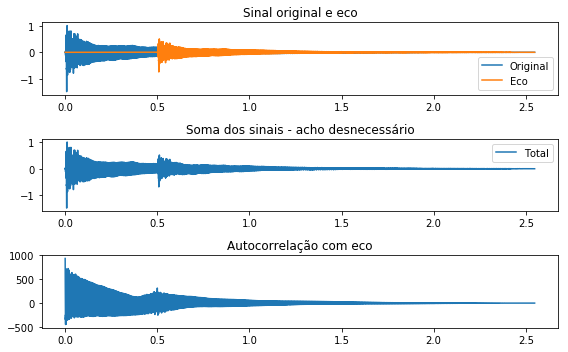

In [4]:
#carregando o áudio
%matplotlib inline
import numpy as np
import scipy.io.wavfile as wv
from IPython.display import Audio
                                 # Inteiro correspondente a posição do eco
alfa = 0.5
fs, x = wv.read('./guitar.wav')
timelag = 0.5;                                                  # Atraso do eco
delta = round(fs*timelag)     
eco = np.zeros(len(x)+delta) 
eco[delta:] = alfa*x 
x_eco = np.zeros(len(eco))
x_eco += eco
x_eco[:len(x)] += x
t = np.linspace(0,len(x_eco)/fs,len(x_eco))
x_eco = x_eco.astype('int16')
wv.write('eco.wav',fs,x_eco)

from matplotlib import pyplot as plt
plt.figure(1,[8,8])
plt.subplot(511)
x = np.concatenate((x,np.zeros(delta)),axis=0) #padding
linha1 = plt.plot(t,x/max(x))
linha2 = plt.plot(t,eco/max(x))
plt.title("Sinal original e eco")
plt.legend(["Original","Eco"])

plt.subplot(512)
plt.plot(t,x_eco/max(x_eco))
plt.title("Soma dos sinais - acho desnecessário")
plt.legend(["Total"])

plt.subplot(513)
autocorrelacao = np.correlate(x_eco/max(x_eco),x_eco/max(x_eco),'full') #valor normalizado
autocorrelacao = autocorrelacao[len(autocorrelacao)//2:]
plt.plot(t,autocorrelacao)
plt.title("Autocorrelação com eco")
plt.tight_layout()
plt.show()


In [1]:
#falta replicar os parâmetros usados no matlab
autocorrelacao1 = autocorrelacao[autocorrelacao>0]
autocorrelacao1/=max(autocorrelacao1)
import peakutils
indexes = peakutils.indexes(autocorrelacao1)

plt.plot(2.0*np.abs(np.fft.fft(autocorrelacao1)))
plt.show()

NameError: name 'autocorrelacao' is not defined

algoritmo para implementar:
- o máximo do sinal original coincide com o máximo do sinal original + eco
- assume-se que o alpha é conhecido